In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [2]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [3]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
...,...,...,...,...,...,...
2022-02-22,856.729980,801.099976,834.130005,821.530029,27762700.0,821.530029
2022-02-23,835.299988,760.559998,830.429993,764.039978,31752300.0,764.039978
2022-02-24,802.479980,700.000000,700.390015,800.770020,45107400.0,800.770020


<AxesSubplot:xlabel='Date'>

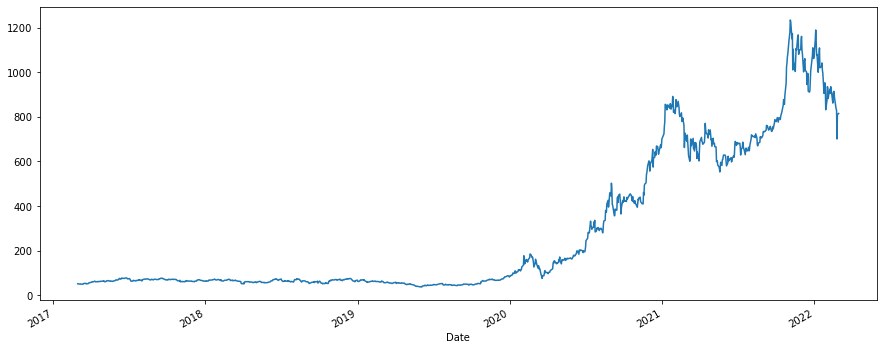

In [4]:
## Simple moving average
df_tesla['Open'].plot(figsize=(15,6))

In [5]:
df_tesla['Open:10 days rolling'] = df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

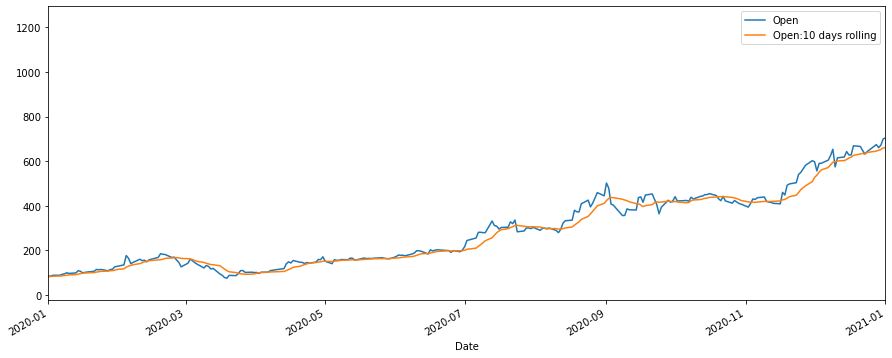

In [6]:
df_tesla[['Open','Open:10 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [7]:
df_tesla['Open:30 days rolling'] = df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open:50 days rolling'] = df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

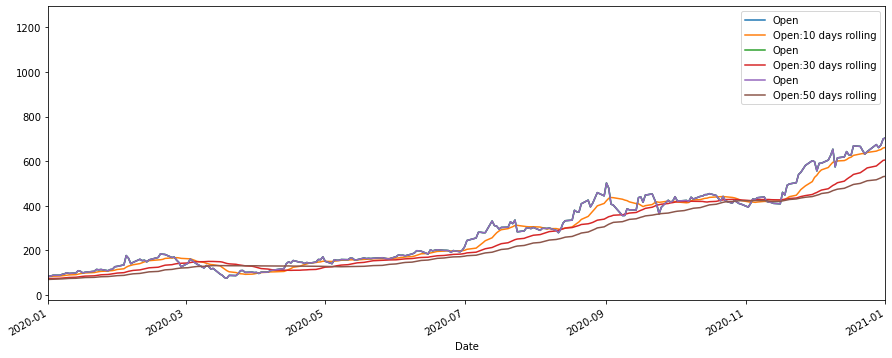

In [8]:
df_tesla[['Open','Open:10 days rolling','Open','Open:30 days rolling','Open','Open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

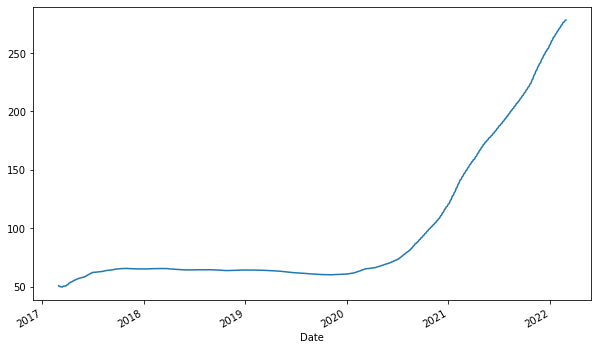

In [14]:
## Expanding
## Cumulative moving average(CMA)
df_tesla['Open'].expanding().mean().plot(figsize=(10,6))

In [15]:
## EWMA - Exponential Moving Average

In [22]:
## EMA Tesla Shares
## Let's smoothning factor - 0.1

df_tesla['EMA_0.1']=df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

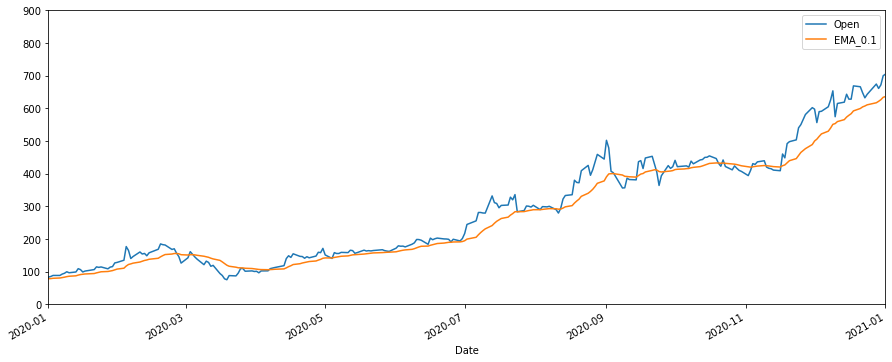

In [27]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],ylim=[0,900],figsize=(15,6))

In [29]:
df_tesla['EMA_0.3']=df_tesla['Open'].ewm(alpha=0.3,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

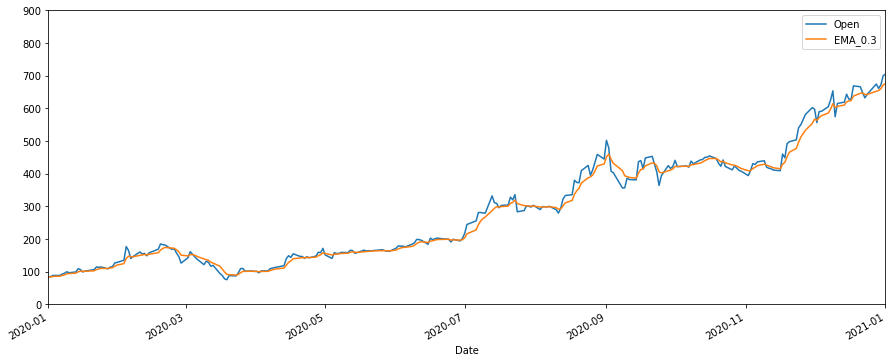

In [30]:
df_tesla[['Open','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],ylim=[0,900],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

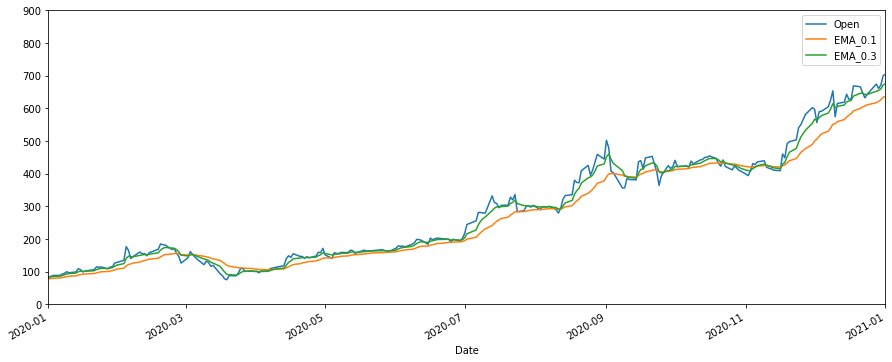

In [31]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],ylim=[0,900],figsize=(15,6))

In [38]:
## EWMA Tesla Shares
## Let's smoothning factor - 0.1

df_tesla['EMA_5days']=df_tesla['Open'].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

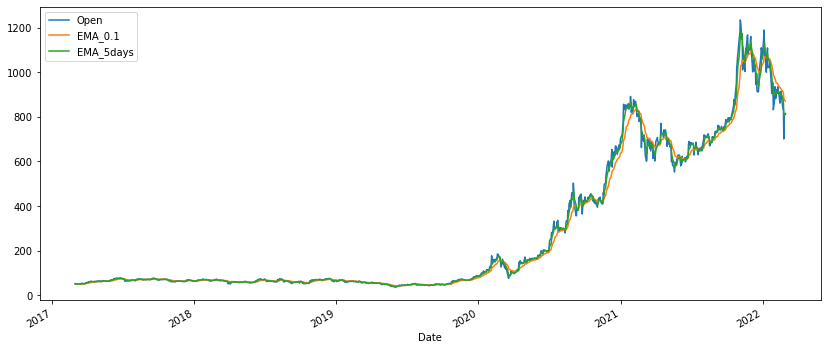

In [39]:
df_tesla[['Open','EMA_0.1','EMA_5days']].plot(figsize=(14,6))